In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [60]:
df = pd.read_csv(r'/content/Unemployment in India (1).csv')
df.columns = df.columns.str.strip()
df.isnull().sum()

,0
Region,28
Date,28
Frequency,28
Estimated Unemployment Rate (%),28
Estimated Employed,28
Estimated Labour Participation Rate (%),28
Area,28


In [ ]:
df.drop_duplicates(keep='first',inplace=True)
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
df['Date'].fillna(method='ffill', inplace=True)
df['Date'].fillna(method='bfill', inplace=True)
df['Frequency'].fillna(method='ffill', inplace=True)
df['Region'].fillna(method='ffill', inplace=True)
df['Area'].fillna(method='ffill', inplace=True)
df['Estimated Unemployment Rate (%)'].fillna(df['Estimated Unemployment Rate (%)'].mean(), inplace=True)
df['Estimated Employed'].fillna(df['Estimated Employed'].mean(), inplace=True)
df['Estimated Labour Participation Rate (%)'].fillna(df['Estimated Labour Participation Rate (%)'].mean(), inplace=True)


In [66]:
df.isnull().sum()

,0
Region,0
Date,0
Frequency,0
Estimated Unemployment Rate (%),0
Estimated Employed,0
Estimated Labour Participation Rate (%),0
Area,0


In [67]:
print(df.info())
print(df.describe())
print(df.nunique())


<class 'pandas.core.frame.DataFrame'>
Index: 741 entries, 0 to 753
Data columns (total 7 columns):
 #   Column                                   Non-Null Count  Dtype         
---  ------                                   --------------  -----         
 0   Region                                   741 non-null    object        
 1   Date                                     741 non-null    datetime64[ns]
 2   Frequency                                741 non-null    object        
 3   Estimated Unemployment Rate (%)          741 non-null    float64       
 4   Estimated Employed                       741 non-null    float64       
 5   Estimated Labour Participation Rate (%)  741 non-null    float64       
 6   Area                                     741 non-null    object        
dtypes: datetime64[ns](1), float64(3), object(3)
memory usage: 46.3+ KB
None
                                Date  Estimated Unemployment Rate (%)  \
count                            741                      

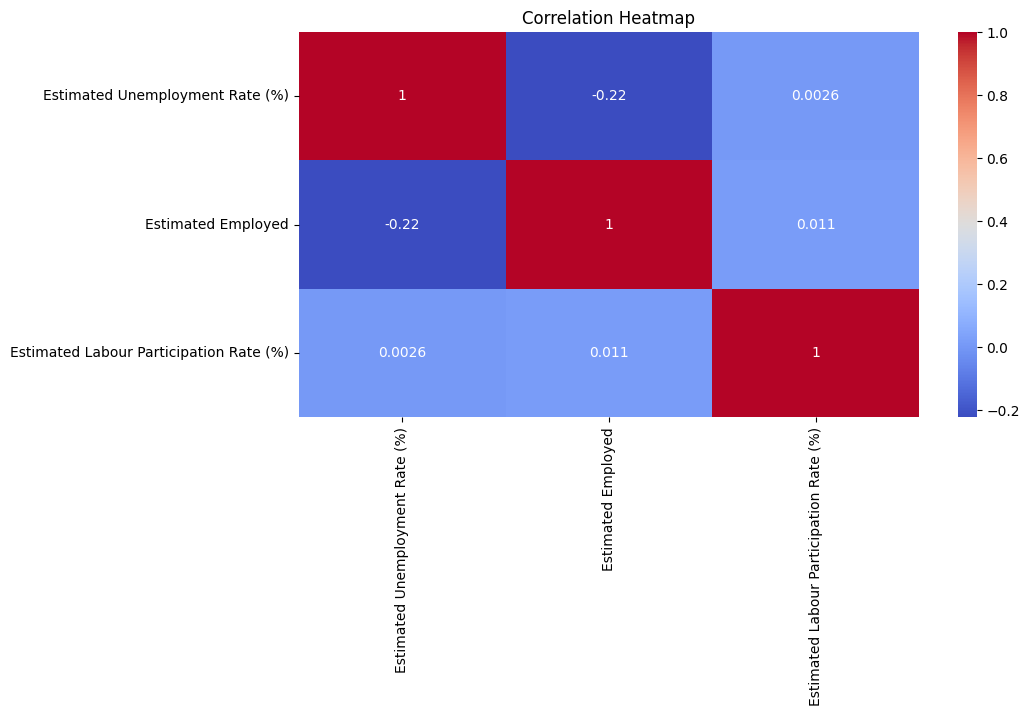

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

df_numeric = df.select_dtypes(include=['number'])

plt.figure(figsize=(10,5))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()


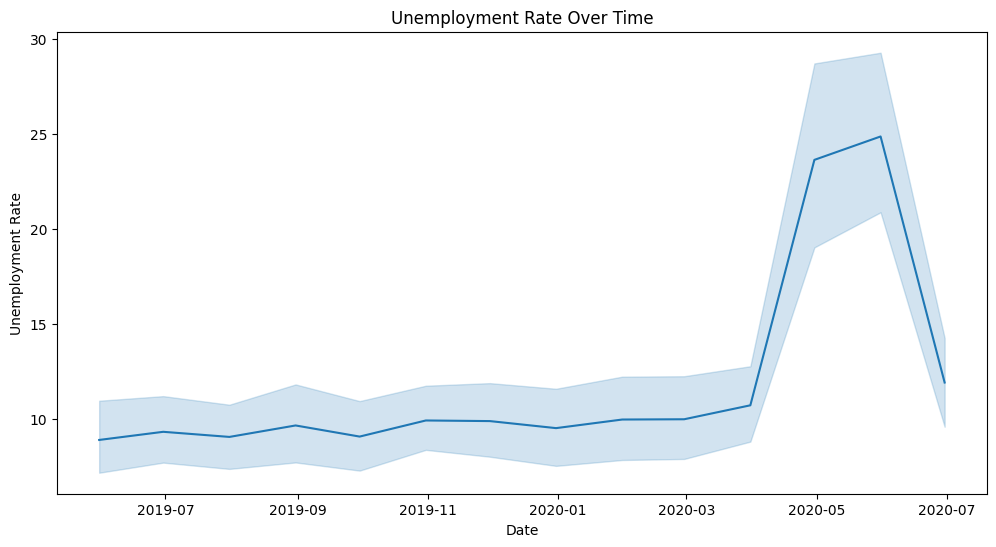

In [70]:
plt.figure(figsize=(12,6))
sns.lineplot(x=df['Date'], y=df['Estimated Unemployment Rate (%)'])
plt.title('Unemployment Rate Over Time')
plt.xlabel('Date')
plt.ylabel('Unemployment Rate')
plt.show()


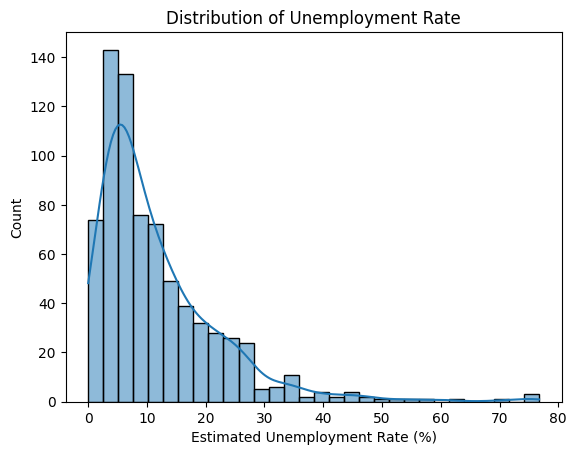

In [76]:
sns.histplot(df['Estimated Unemployment Rate (%)'], kde=True, bins=30)
plt.title('Distribution of Unemployment Rate')
plt.show()


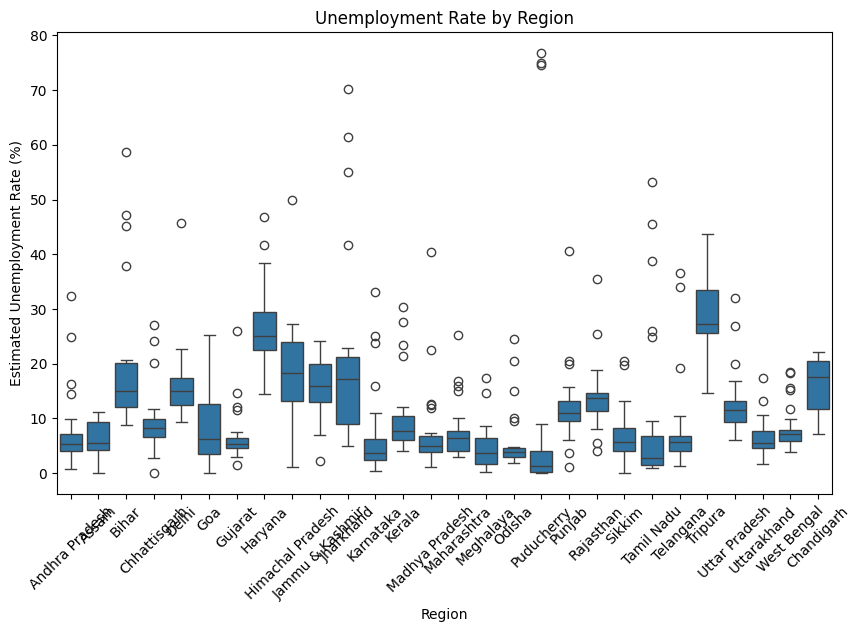

In [78]:
plt.figure(figsize=(10,6))
sns.boxplot(x='Region', y='Estimated Unemployment Rate (%)', data=df)
plt.xticks(rotation=45)
plt.title('Unemployment Rate by Region')
plt.show()


In [93]:
from sklearn.preprocessing import StandardScaler
df['Date'] = pd.to_numeric(pd.to_datetime(df['Date']))
df = pd.get_dummies(df, drop_first=True)
numerical_features = ['Estimated Unemployment Rate (%)', 'Date', 'Estimated Employed', 'Estimated Labour Participation Rate (%)']
scaler = StandardScaler()
df[numerical_features] = scaler.fit_transform(df[numerical_features])

In [94]:
from sklearn.model_selection import train_test_split

X = df.drop(columns=['Estimated Unemployment Rate (%)'])
y = df['Estimated Unemployment Rate (%)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [95]:
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X_train, y_train)

y_pred = reg.predict(X_test)


In [96]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

print("MAE:", mean_absolute_error(y_test, y_pred))
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MAE: 0.4191106892354631
MSE: 0.4703871241552922
R2 Score: 0.39234224020588104


In [92]:
import joblib
joblib.dump(reg, 'unemployment_model.pkl')


['unemployment_model.pkl']